# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [38]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [39]:
len(df)

400

In [40]:
df.index

RangeIndex(start=0, stop=400, step=1)

Answer: There are 400 rows of data (index values 0 to 399) and we have four features:
1. admit
2. gre
3. gpa
4. prestige

> ### Question 2.  Create a summary table.

In [41]:
# st --> stands for Summary Table
#st = pd.DataFrame([max(df['gpa']), min(df['gpa']), max(df['gre']), min(df['gre']), max(df['prestige']), min(df['prestige']),index=["GPA - Max", "GPA - Min", "GRE - Max", "GRE - Min", "Prestige - Max", "Prestige - Min"])
# index=["Admit", "GPA", "GRE", "Prestige"]

st = pd.DataFrame([[max(df['admit']), max(df['gpa']), max(df['gre']), max(df['prestige'])], [min(df['admit']), min(df['gpa']), min(df['gre']), min(df['prestige'])]])
st = st.T
st.index = ["Admit", "GPA", "GRE", "Prestige"]
st.columns = ["Max", "Min"] 
st

,Max,Min
Admit,1.0,0.00
GPA,4.0,2.26
GRE,800.0,220.00
Prestige,4.0,1.00


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [42]:
gpa = df['gpa']
gpa.mean(), gpa.var()

(3.3909296482412077, 0.14487948622204228)

In [43]:
gre = df['gre']
gre.mean(), gre.var()

(588.0402010050251, 13369.953039758006)

Answer: GPA values range from 2.26 to 4. I.e. the maximum value is less than two times the minimum value.  On the other hand, GRE scores range from 220 to 800: the max is almost four times the min.

Therefore GRE values have a larger spread.

(Of course, the variance is the measure of the squares of the deviation from the mean. So, the difference of the values of the variance is tremendous: 0.14 vs 13369.96

> ### Question 4.  Drop data points with missing data.

In [44]:
counts_df = pd.DataFrame(df.groupby('admit').size().rename('count'))
counts_df

,count
admit,
0,273
1,127


We can see above that the "admit" feature does not have any missing values: 273 + 127 = 400

In [45]:
df.groupby('admit').count()

,gre,gpa,prestige
admit,,,
0,271,272,273
1,127,126,126


In [46]:
df.isnull().any()

admit       False
gre          True
gpa          True
prestige     True
dtype: bool

The above two are two different ways to see which columns have NaN entries.
In the first, grouping by "admit" (which we know has no blanks), we can see that gre has 398(271+127) values (hence, two blanks),
gpa has two blanks (400-272-126) and
prestige has one blank (400-273-126)

In [47]:
df2 = df.dropna()
df2.reset_index(drop=True, inplace=True)
df2

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
392,0,620.0,4.00,2.0
393,0,560.0,3.04,3.0
394,0,460.0,2.63,2.0
395,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [48]:
grenan = df['gre'].index[df['gre'].apply(np.isnan)]
grenan

Int64Index([187, 212], dtype='int64')

In [49]:
gpanan = df['gpa'].index[df['gpa'].apply(np.isnan)]
gpanan

Int64Index([187, 236], dtype='int64')

In [50]:
prestnan = df['prestige'].index[df['prestige'].apply(np.isnan)]
prestnan

Int64Index([236], dtype='int64')

In [51]:
df.iloc[187], df.iloc[212], df.iloc[236]

(admit       0.0
 gre         NaN
 gpa         NaN
 prestige    2.0
 Name: 187, dtype: float64, admit       0.00
 gre          NaN
 gpa         2.87
 prestige    2.00
 Name: 212, dtype: float64, admit         1.0
 gre         660.0
 gpa           NaN
 prestige      NaN
 Name: 236, dtype: float64)

Answer: See above - in the first three cells we find the nan rows, and in the last cell we check those rows

> ### Question 6.  Create boxplots for `gre` and `gpa`.

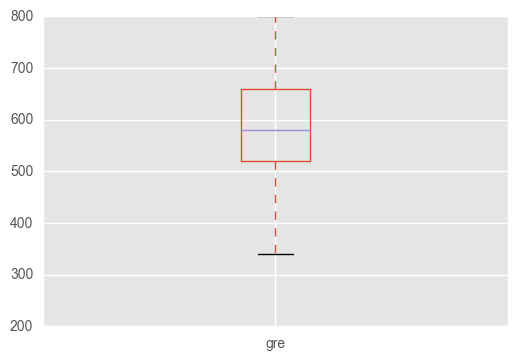

In [52]:
%matplotlib inline

df.boxplot('gre', return_type='axes')

#plt.figure(
#plt.boxplot(df2['gre'], df2['admit'])

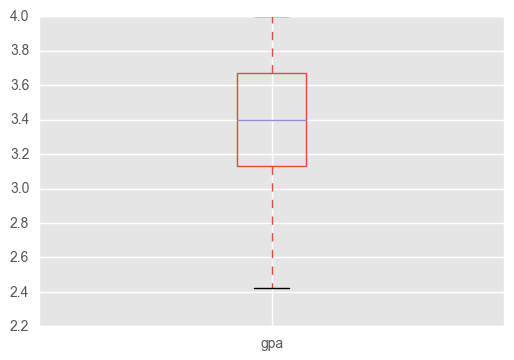

In [53]:
%matplotlib inline

df.boxplot('gpa', return_type='axes')

> ### Question 7.  What do boxplots show?

Answer: 
1. The median, 
2. The range of one quartile above and one quartile below the median (25%, 75%^)
3. The min and max


> ### Question 8.  Plot the distribution of each variable.

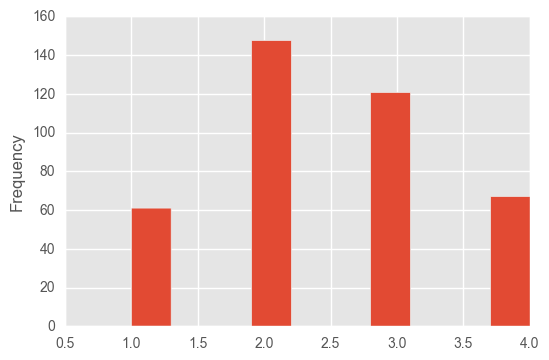

In [73]:
df2['prestige'].plot(kind='hist')

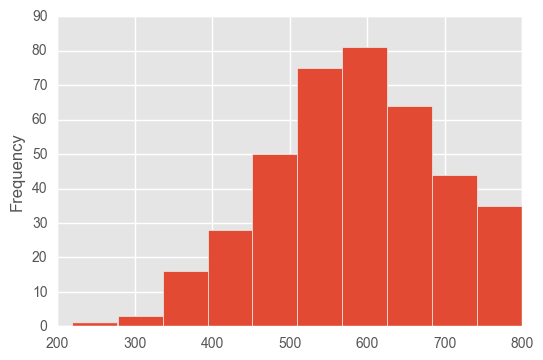

In [75]:
df2['gre'].plot(kind='hist')

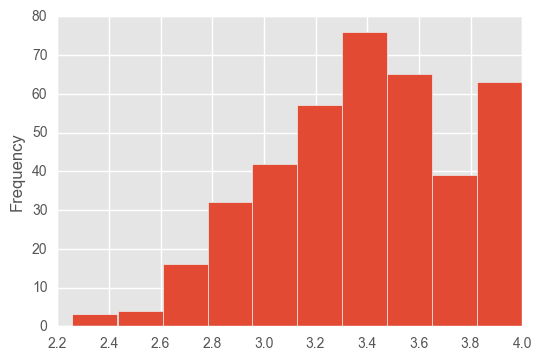

In [71]:
df2['gpa'].plot(kind='hist')

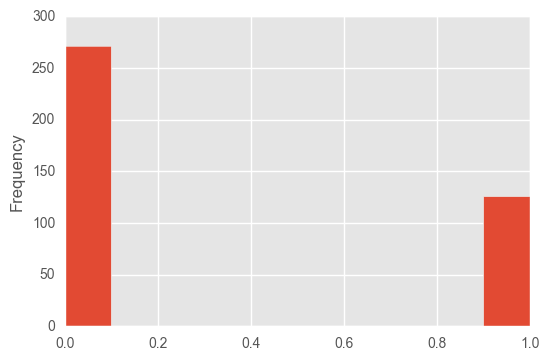

In [70]:
df2['admit'].plot(kind='hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

The gpa distribution is skewed to the right as we can see from the plot above. This makes sense because UCLA is a good school. Therefore, more students with high gpa will apply than ones with low gpa

Similarly, to get in to UCLA you need a good gre score, so many students who have a lower score they do not even bother applying. As a result, again, the distribution is skewed to the right

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

In [76]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: gre and gpa have the highest colinearity. But, it is not very high, overall - we should not drop either one of these two variables

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: We need to examine these two variables next to each other and see how the prestige of the school influences the admission. For that, we would need to compare students who have the same gre and gpa (or, very similar) but differ in their school's prestige.

> ### Question 13.  What is your hypothesis?

Answer: The hypothesis can be: "Given equal gre and gpa scores, a student from a more prestigious school is more likely to be admitted